In [83]:
#from satsearch import Search
import intake
import stackstac, os, requests
import pystac
import pystac_client
from netrc import netrc
from subprocess import Popen
from getpass import getpass
import rasterio
from distributed import LocalCluster,Client
import datetime
import dask.array as dask_array
import dask
import dask.diagnostics

#from utils import DevNullStore,DiagnosticTimer,total_nthreads,total_ncores,total_workers,get_chunksize

import geopandas as gpd
import rioxarray
from matplotlib import colors as mcolours
import numpy as np
import xarray as xr


In [2]:
import os
env = dict(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR', 
                   AWS_NO_SIGN_REQUEST='YES',
                   GDAL_MAX_RAW_BLOCK_CACHE_SIZE='200000000',
                   GDAL_SWATH_SIZE='200000000',
                   VSI_CURL_CACHE_SIZE='200000000',
                   GDAL_HTTP_COOKIEFILE=os.path.expanduser('~/cookies.txt'),
                   GDAL_HTTP_COOKIEJAR=os.path.expanduser('~/cookies.txt'))


os.environ.update(env)
    
# dask.config.set({'distributed.dashboard.link':'/proxy/{port}/status'})
# cluster = LocalCluster(threads_per_worker=1)
# cl = Client(cluster)
# cl

In [16]:
cat
print(cat.description)
print('Contains {} items.'.format(len(cat.get_item_links())))

Landcover data projected in EPSG:32722 (UTM Zone 22S)
Contains 7 items.


In [21]:
item.assets 

{'image': <Asset href=https://soilspackage-useast.s3.amazonaws.com/EsriLandCover/22H_20200101-20210101.tif>}

In [4]:
cat = pystac.Catalog.from_file('https://esri-lulc-2020-stac.s3.amazonaws.com/catalog.json')

In [67]:
cat
#for root, catalogs, items in cat.walk():
    #for item in items:
        #print(item)

<Catalog id=esri-lulc-2020>

In [13]:

label_item = cat.get_child('esri-lulc-2020').get_child('32722').get_item('22H_20200101-20210101')
print(type(label_item))
label_item.to_dict()

<class 'pystac.item.Item'>


{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': '22H_20200101-20210101',
 'properties': {'start_datetime': '2020-01-01T00:00:00.00Z',
  'end_datetime': '2021-01-01T00:00:00.00Z',
  'proj:epsg': 32722,
  'proj:geometry': {'type': 'Polygon',
   'coordinates': [[[131321.6615228557, 6501079.073360655],
     [131321.6615228557, 6105479.073360655],
     [484001.6615228557, 6105479.073360655],
     [484001.6615228557, 6501079.073360655],
     [131321.6615228557, 6501079.073360655]]]},
  'proj:bbox': [131321.6615228557,
   6105479.073360655,
   484001.6615228557,
   6501079.073360655],
  'proj:shape': [39560, 35268],
  'proj:transform': [10.0,
   0.0,
   131321.6615228557,
   0.0,
   -10.0,
   6501079.073360655,
   0.0,
   0.0,
   1.0],
  'raster:bands': [{'sampling': 'area',
    'data_type': 'uint8',
    'scale': 1.0,
    'offset': 0.0,
    'nodata': 0.0,
    'statistics': {'mean': 3.0751082483223877,
     'minimum': 1,
     'maximum': 8,
     'stdev': 1.4724936048004038,
     'valid_per

In [15]:
type(label_item)

pystac.item.Item

In [87]:
labellist = []
label_item = cat.get_child('esri-lulc-2020').get_child('32721').get_items()
for i in label_item:
    labellist.append(i)
#label_item.to_dict()

In [88]:
labellist

[<Item id=21H_20200101-20210101>,
 <Item id=21M_20200101-20210101>,
 <Item id=21L_20200101-20210101>,
 <Item id=21C_20200101-20210101>,
 <Item id=21K_20200101-20210101>,
 <Item id=21J_20200101-20210101>,
 <Item id=21E_20200101-20210101>,
 <Item id=21F_20200101-20210101>]

In [89]:
#ic = pystac.item_collection.ItemCollection(labellist)
ic2 = pystac_client.ItemCollection(labellist)

In [8]:
ic2

In [13]:
ic2[0].properties

{'start_datetime': '2020-01-01T00:00:00.00Z',
 'end_datetime': '2021-01-01T00:00:00.00Z',
 'proj:epsg': 32722,
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[131321.6615228557, 6501079.073360655],
    [131321.6615228557, 6105479.073360655],
    [484001.6615228557, 6105479.073360655],
    [484001.6615228557, 6501079.073360655],
    [131321.6615228557, 6501079.073360655]]]},
 'proj:bbox': [131321.6615228557,
  6105479.073360655,
  484001.6615228557,
  6501079.073360655],
 'proj:shape': [39560, 35268],
 'proj:transform': [10.0,
  0.0,
  131321.6615228557,
  0.0,
  -10.0,
  6501079.073360655,
  0.0,
  0.0,
  1.0],
 'raster:bands': [{'sampling': 'area',
   'data_type': 'uint8',
   'scale': 1.0,
   'offset': 0.0,
   'nodata': 0.0,
   'statistics': {'mean': 3.0751082483223877,
    'minimum': 1,
    'maximum': 8,
    'stdev': 1.4724936048004038,
    'valid_percent': 50.863289806955095},
   'histogram': {'count': 11,
    'min': 1.0,
    'max': 8.0,
    'buckets': [86851, 48606, 22546

In [33]:
#ic[0]
newlist = []
import time
from calendar import timegm

for i, key in enumerate(labellist):
    #key.properties.datetime = key.properties['start_datetime']
    #print(key.properties['start_datetime'])
    newlist.append(key)
    print(newlist[i])
    #epoch_time = int(time.time())
    utc_time = time.strptime(newlist[i].properties['start_datetime'],  "%Y-%m-%dT%H:%M:%S.%fZ")
    epoch_time = timegm(utc_time)

    newlist[i].properties['datetime'] = epoch_time 
    
newlist[i].properties    

<Item id=22H_20200101-20210101>
<Item id=22M_20200101-20210101>
<Item id=22L_20200101-20210101>
<Item id=22C_20200101-20210101>
<Item id=22K_20200101-20210101>
<Item id=22J_20200101-20210101>
<Item id=22E_20200101-20210101>


{'start_datetime': '2020-01-01T00:00:00.00Z',
 'end_datetime': '2021-01-01T00:00:00.00Z',
 'proj:epsg': 32722,
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[269610.97511073336, 3290004.074400367],
    [269610.97511073336, 2938754.074400367],
    [738690.9751107334, 2938754.074400367],
    [738690.9751107334, 3290004.074400367],
    [269610.97511073336, 3290004.074400367]]]},
 'proj:bbox': [269610.97511073336,
  2938754.074400367,
  738690.9751107334,
  3290004.074400367],
 'proj:shape': [35125, 46908],
 'proj:transform': [10.0,
  0.0,
  269610.97511073336,
  0.0,
  -10.0,
  3290004.074400367,
  0.0,
  0.0,
  1.0],
 'raster:bands': [{'sampling': 'area',
   'data_type': 'uint8',
   'scale': 1.0,
   'offset': 0.0,
   'nodata': 0.0,
   'statistics': {'mean': 1.7965942085851057,
    'minimum': 1,
    'maximum': 10,
    'stdev': 2.431527535243205,
    'valid_percent': 1.6224688314863103},
   'histogram': {'count': 11,
    'min': 1.0,
    'max': 10.0,
    'buckets': [11500, 1, 0, 

In [38]:
ic2 = pystac_client.ItemCollection(newlist)
ic_dict = ic2.to_dict()

In [46]:
for i, x in enumerate(ic2):
    #print(x.properties, newlist[i].properties)
    x.properties['datetime'] = newlist[i].properties['datetime']
    
ic2

In [58]:
for i in range(7):
    #print(newlist[i].properties['datetime'])
    ic2[i].properties['datetime'] = newlist[i].properties['datetime']
    

print(ic2[i].properties['datetime'])    


1577836800


In [59]:
ic2[i].properties

{'start_datetime': '2020-01-01T00:00:00.00Z',
 'end_datetime': '2021-01-01T00:00:00.00Z',
 'proj:epsg': 32722,
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[269610.97511073336, 3290004.074400367],
    [269610.97511073336, 2938754.074400367],
    [738690.9751107334, 2938754.074400367],
    [738690.9751107334, 3290004.074400367],
    [269610.97511073336, 3290004.074400367]]]},
 'proj:bbox': [269610.97511073336,
  2938754.074400367,
  738690.9751107334,
  3290004.074400367],
 'proj:shape': [35125, 46908],
 'proj:transform': [10.0,
  0.0,
  269610.97511073336,
  0.0,
  -10.0,
  3290004.074400367,
  0.0,
  0.0,
  1.0],
 'raster:bands': [{'sampling': 'area',
   'data_type': 'uint8',
   'scale': 1.0,
   'offset': 0.0,
   'nodata': 0.0,
   'statistics': {'mean': 1.7965942085851057,
    'minimum': 1,
    'maximum': 10,
    'stdev': 2.431527535243205,
    'valid_percent': 1.6224688314863103},
   'histogram': {'count': 11,
    'min': 1.0,
    'max': 10.0,
    'buckets': [11500, 1, 0, 

In [ ]:
cat.describe()

* <Catalog id=esri-lulc-2020>
    * <Collection id=esri-lulc-2020>
        * <Catalog id=32632>
          * <Item id=32S_20200101-20210101>
          * <Item id=32R_20200101-20210101>
          * <Item id=32U_20200101-20210101>
          * <Item id=32Q_20200101-20210101>
          * <Item id=32P_20200101-20210101>
          * <Item id=32T_20200101-20210101>
          * <Item id=32N_20200101-20210101>
          * <Item id=32W_20200101-20210101>
          * <Item id=32V_20200101-20210101>
        * <Catalog id=32735>
          * <Item id=35H_20200101-20210101>
          * <Item id=35D_20200101-20210101>
          * <Item id=35M_20200101-20210101>
          * <Item id=35L_20200101-20210101>
          * <Item id=35C_20200101-20210101>
          * <Item id=35K_20200101-20210101>
          * <Item id=35J_20200101-20210101>
        * <Catalog id=32750>
          * <Item id=50H_20200101-20210101>
          * <Item id=50D_20200101-20210101>
          * <Item id=50M_20200101-20210101>
          

In [92]:
url = 'https://esri-lulc-2020-stac.s3.amazonaws.com' 
collection = ['esri-lulc-2020']#'C1711924822-LPCLOUD' #HLS
bbox = [-53.0172669999999968,-9.5331669999999988,-48.4956669999999974,-3.1035670000000000]    
bbox = [-53.0232820986343754,-8.1236837545427090, -49.4688521093868800,-4.8677173521785928] #carra grav

#stack = stackstac.stack(ic2[i], epsg=6933, resolution=1000, resampling=1, assets=['image'], sortby_date=False)
stack = stackstac.stack(ic2,  resolution=1000, resampling=1, assets=['image'], sortby_date=False)

stack


<xarray.DataArray 'stackstac-69705b07ca74a04c01999aba105cc09e' (time: 8, band: 1, y: 9039, x: 826)>
dask.array<fetch_raster_window, shape=(8, 1, 9039, 826), dtype=float64, chunksize=(1, 1, 1024, 826), chunktype=numpy.ndarray>
Coordinates: (12/15)
  * time                  (time) datetime64[ns] NaT NaT NaT NaT NaT NaT NaT NaT
    id                    (time) <U21 '21H_20200101-20210101' ... '21F_202001...
  * band                  (band) <U5 'image'
  * x                     (x) float64 8.3e+04 8.4e+04 ... 9.07e+05 9.08e+05
  * y                     (y) float64 1.01e+07 1.01e+07 ... 1.063e+06 1.062e+06
    start_datetime        <U23 '2020-01-01T00:00:00.00Z'
    ...                    ...
    proj:geometry         (time) object {'type': 'Polygon', 'coordinates': [[...
    storage:request_pays  bool False
    storage:platform      <U3 'AWS'
    storage:tier          <U8 'Standard'
    storage:region        <U9 'us-east-1'
    epsg                  int32 32721
Attributes:
    spec:        RasterSpec(epsg=32721, bounds=(83000, 1061000, 909000, 10100...
    crs:         epsg:32721
    transform:   | 1000.00, 0.00, 83000.00|\n| 0.00,-1000.00, 10100000.00|\n|...
    resolution:  1000

AttributeError: 'Rectangle' object has no property 'cmap'

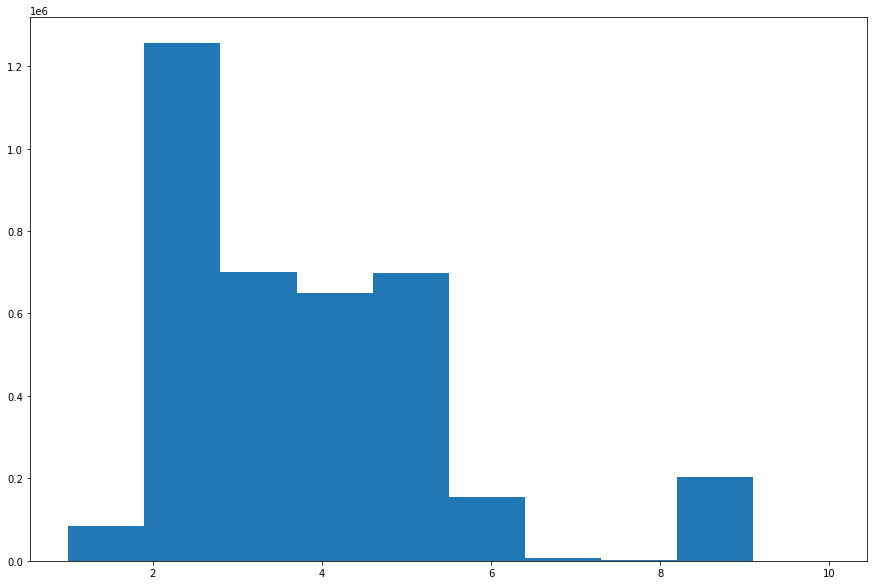

In [96]:
cmap = mcolours.ListedColormap([
      np.array([0, 0, 0]) / 255,
      np.array([65, 155, 223]) / 255,
      np.array([57, 125, 73]) / 255,
      np.array([136, 176, 83]) / 255,
      np.array([122, 135, 198]) / 255,
      np.array([228, 150, 53]) / 255,
      np.array([223, 195, 90]) / 255,
      np.array([196 ,40, 27]) / 255,
      np.array([165, 155, 143]) / 255,
      np.array([168, 235, 255]) / 255,
      np.array([97, 97, 97]) / 255
])
bounds=range(0,12)
norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)


#stack.plot(aspect=1,size=8)

#stack.isel(time=0).squeeze().plot.imshow(cmap=cmap, norm=norm, size=10)

#stack.squeeze().plot.imshow(cmap=cmap, norm=norm, size=10)

stack.squeeze().plot(cmap=cmap, norm=norm, size=10)


In [100]:
def median(array, dim, keep_attrs=False, skipna=True, **kwargs):
    """ Runs a median on an dask-backed xarray.
    
    This function does not scale!
    It will rechunk along the given dimension, so make sure 
    your other chunk sizes are small enough that it 
    will fit into memory.
    
    :param DataArray array: An xarray.DataArray wrapping a dask array
    :param dim str: The name of the dim in array to calculate the median
    """
    if type(array) is xr.Dataset:
        return array.apply(median, dim=dim, keep_attrs=keep_attrs, **kwargs)
    
    if not hasattr(array.data, 'dask'):
        return array.median(dim, keep_attrs=keep_attrs, **kwargs)
    
    array = array.chunk({dim:-1})
    axis = array.dims.index(dim)
    median_func = np.nanmedian if skipna else np.median
    blocks = dask.array.map_blocks(median_func, array.data, dtype=array.dtype, drop_axis=axis, axis=axis, **kwargs)
    
    new_coords={k: v for k, v in array.coords.items() if k != dim and dim not in v.dims}
    new_dims = tuple(d for d in array.dims if d != dim)
    new_attrs = array.attrs if keep_attrs else None
    
    return xr.DataArray(blocks, coords=new_coords, dims=new_dims, attrs=new_attrs)

median_stack = median(stack, dim="time")

In [101]:
median_stack

<xarray.DataArray 'nanmedian-3e4af45771f38a8f174cea706812087e' (band: 1, y: 9039, x: 826)>
dask.array<nanmedian, shape=(1, 9039, 826), dtype=float64, chunksize=(1, 1024, 826), chunktype=numpy.ndarray>
Coordinates:
  * band                  (band) <U5 'image'
  * x                     (x) float64 8.3e+04 8.4e+04 ... 9.07e+05 9.08e+05
  * y                     (y) float64 1.01e+07 1.01e+07 ... 1.063e+06 1.062e+06
    start_datetime        <U23 '2020-01-01T00:00:00.00Z'
    proj:epsg             int32 32721
    end_datetime          <U23 '2021-01-01T00:00:00.00Z'
    storage:request_pays  bool False
    storage:platform      <U3 'AWS'
    storage:tier          <U8 'Standard'
    storage:region        <U9 'us-east-1'
    epsg                  int32 32721

In [106]:
median_stack.plot()

RuntimeError: Error reading Window(col_off=0, row_off=7168, width=826, height=1024) from 'https://soilspackage-useast.s3.amazonaws.com/EsriLandCover/21E_20200101-20210101.tif': RasterioIOError('Read or write failed. IReadBlock failed at X offset 0, Y offset 56: /vsicurl/https://soilspackage-useast.s3.amazonaws.com/EsriLandCover/21E_20200101-20210101.tif, band 1: IReadBlock failed at X offset 117, Y offset 157: _TIFFPartialReadStripArray:Cannot read offset/size for strile around ~23981')

In [ ]:
median_stack.sel(x=[700000,840000],y=[1000000,1001000]).plot()